In [3]:
import os
os.environ["OMP_NUM_THREADS"] = "1"

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.cluster import KMeans

#### Read the Dataset for Understanding

In [4]:
# Read the dataset
df = pd.read_excel('Mall_Customers.xlsx')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
# display first 5 rows
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


##### Prepocessing data

In [6]:
# Renaming columns
df = df.rename(columns={'Annual Income (k$)': 'Annual Income'})
df = df.rename(columns={'Spending Score (1-100)': 'Spending Score'})

In [7]:
# Description of the data
df.describe()

,CustomerID,Age,Annual Income,Spending Score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


##### 1. Perfrom One Hot Encoding on Gender as it is a categorical column

In [8]:
df['Gender'].value_counts()

Gender
Female    112
Male       88
Name: count, dtype: int64

In [9]:
#perform One Hot Encoding on categorical column(Gender), dropping the first category to avoid multicollinearity

encoder = OneHotEncoder(drop='first', sparse_output=False)
encoded = encoder.fit_transform(df[['Gender']])
encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(['Gender']))
df_encoded = pd.concat([df.drop(['Gender'], axis=1), encoded_df], axis=1)
df_encoded.head()

,CustomerID,Age,Annual Income,Spending Score,Gender_Male
0,1,19,15,39,1.0
1,2,21,15,81,1.0
2,3,20,16,6,0.0
3,4,23,16,77,0.0
4,5,31,17,40,0.0


### **KMeans Clustering**

This cell applies `KMeans` clustering to the preprocessed dataset (`data_encoded`). The `KMeans` algorithm is fitted with 3 clusters, and the resulting cluster labels are added as a new column (`cluster`) to the dataframe. The updated dataframe with cluster assignments is displayed.

In [10]:
Y = df_encoded

# Fit KMeans with 3 clusters (you can change n_clusters as needed)
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(Y)

# Add cluster labels to the dataframe
df_encoded['cluster'] = clusters

df_encoded.head()

,CustomerID,Age,Annual Income,Spending Score,Gender_Male,cluster
0,1,19,15,39,1.0,2
1,2,21,15,81,1.0,2
2,3,20,16,6,0.0,2
3,4,23,16,77,0.0,2
4,5,31,17,40,0.0,2


### **Elbow Method for Optimal Number of Clusters**

This cell calculates and visualizes the inertia (sum of squared distances to the nearest cluster center) for different values of `k` (number of clusters) using the `KMeans` algorithm. The inertia values are plotted against the number of clusters to help identify the **"elbow point,"** which suggests the optimal number of clusters for `KMeans` clustering on the dataset.

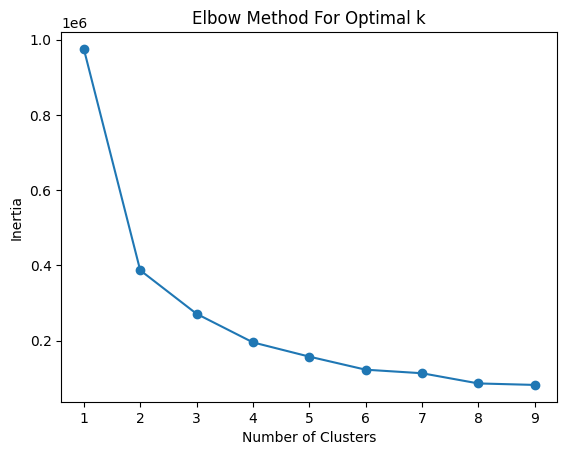

In [11]:
inertia = []
cluster_range = range(1, 10)
for k in cluster_range:
  kmeans = KMeans(n_clusters=k, random_state=42)
  kmeans.fit(Y)
  inertia.append(kmeans.inertia_)

plt.plot(cluster_range, inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

### **Feature Selection for Clustering**

To properly visualize the clustering, selects a subset of features (`Age`, `Annual Income`, and `Spending Score`) from the preprocessed dataset (`df_encoded`) to perform clustering. It fits the KMeans algorithm with 3 clusters to the selected features and assigns the resulting cluster labels to a new column (`cluster`).

In [14]:
# Make a subset of the relevant features for clustering
Y_sub = Y[['Age', 'Annual Income',	'Spending Score']]

# Fit KMeans with 3 clusters (you can change n_clusters as needed)
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(Y)

# Add cluster labels to the dataframe
Y_sub['cluster'] = clusters

Y_sub.head()

C:\Users\vicky\AppData\Local\Temp\ipykernel_25344\2423023142.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Y_sub['cluster'] = clusters


,Age,Annual Income,Spending Score,cluster
0,19,15,39,0
1,21,15,81,0
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0


#### **Visualization of Subset Dataset Clusters**

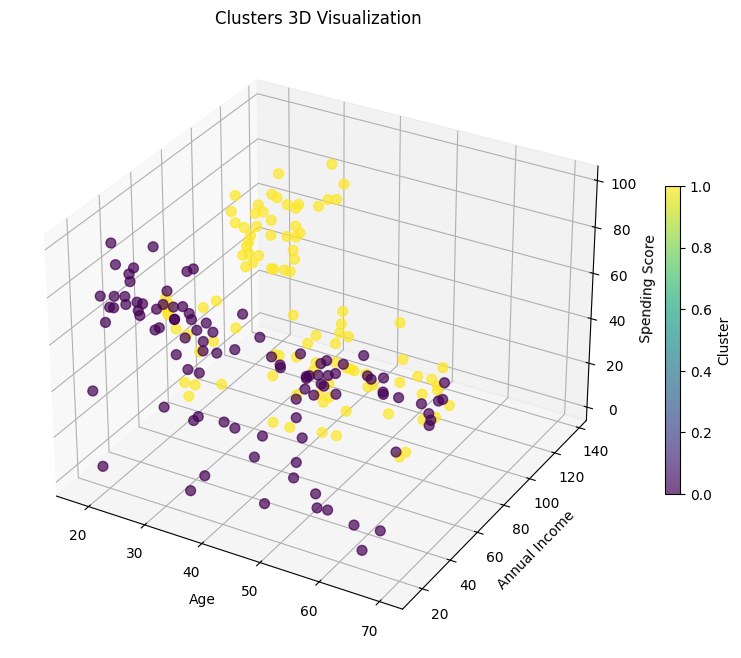

In [15]:
# Create 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(Y_sub['Age'], Y_sub['Annual Income'], Y_sub['Spending Score'], 
                    c=Y_sub['cluster'], cmap='viridis', alpha=0.7, s=50)

ax.set_xlabel('Age')
ax.set_ylabel('Annual Income')
ax.set_zlabel('Spending Score')
ax.set_title('Clusters 3D Visualization')

# Add colorbar legend
plt.colorbar(scatter, ax=ax, shrink=0.5, aspect=20, label='Cluster')

plt.show()

##### The optimal number of clusters for this model is 4, though it was stated to use 3, however, seen from the elbow method, the optimal number of clusters will be 4

##### **Why will 4 number of clusters work better?**
* With k=3, the cautious and VIPs wealthy customers are grouped into one clusters.
* With k=4, they will be separated into 2 distinct groups, which makes business decisions better to make.